# Palmer Penguins

The Palmer Penguins dataset contains morphological measurements for 344 penguins observed on islands in the Palmer Archipelago, Antarctica. It serves as an alternative to the Iris dataset for classification and exploratory data analysis tasks.

- Instances: 344 individual penguins

- Species (targets): Adelie, Gentoo, Chinstrap

- Features:

        island

        bill_length_mm

        bill_depth_mm

        flipper_length_mm
  
        body_mass_g

The dataset is useful for visualizing clustering, classification, and understanding biological variation across species.


<p align="center">
    <img src="../images/adelie_penguin.png" width="200"/> Adelie &nbsp;&nbsp;&nbsp;&nbsp;
    <img src="../images/gentoo_penguin.png" width="200"/> Gentoo &nbsp;&nbsp;&nbsp;&nbsp;
    <img src="../images/chinstrap_penguin.png" width="150"/> Chinstrap
</p>


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

import warnings
warnings.filterwarnings("ignore")


In [3]:
from palmerpenguins import load_penguins
penguins = load_penguins()

In [4]:
penguins.head(len(penguins))


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


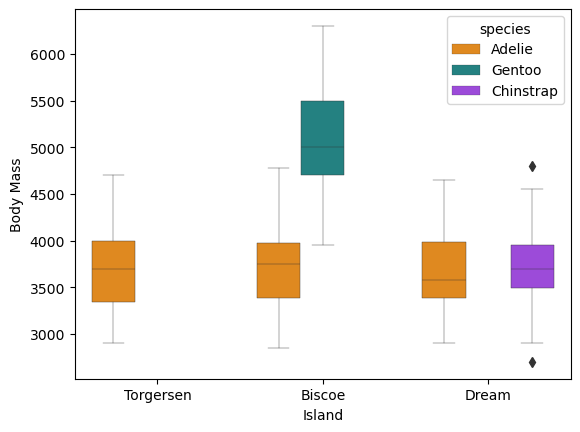

In [5]:
import seaborn as sns

g = sns.boxplot(x = 'island',y ='body_mass_g',hue = 'species',data = penguins,palette=['#FF8C00','#159090','#A034F0'],linewidth=0.3)
g.set_xlabel('Island')
g.set_ylabel('Body Mass')
plt.show()

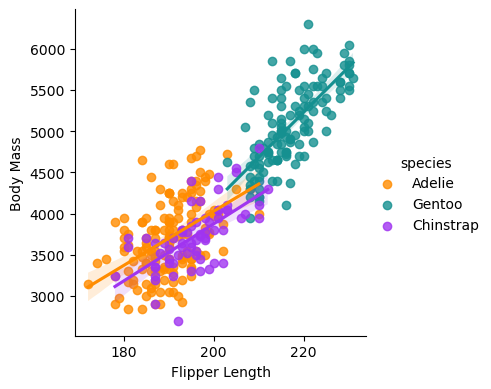

In [6]:
g = sns.lmplot(x="flipper_length_mm",y="body_mass_g",hue="species",height=4,data=penguins,palette=['#FF8C00','#159090','#A034F0'])
g.set_xlabels('Flipper Length')
g.set_ylabels('Body Mass')
plt.show()

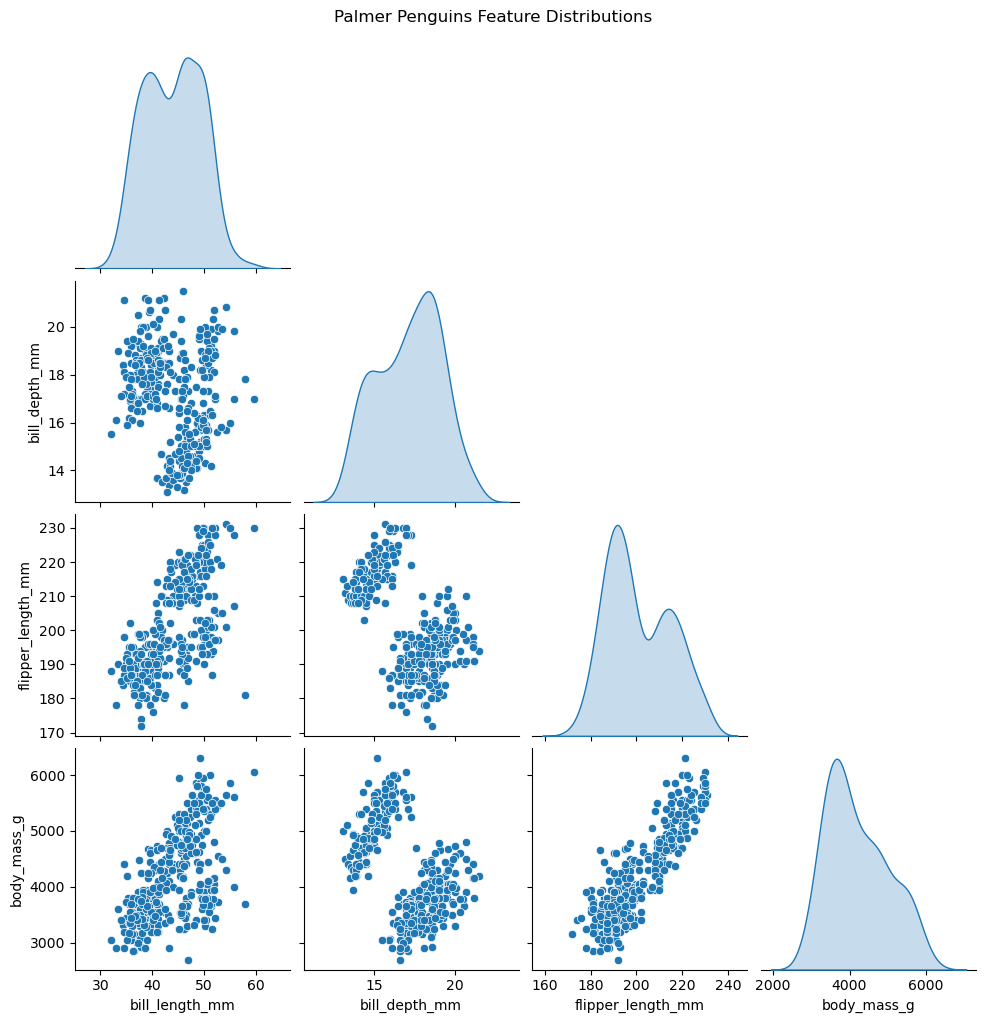

In [7]:
# Drop rows with missing values (corner plots require complete data)
penguins = penguins.dropna()

# Select only numeric features
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Create the corner/pair plot
sns.pairplot(penguins[features], corner=True, diag_kind='kde')
plt.suptitle("Palmer Penguins Feature Distributions", y=1.02)
plt.show()

### Clustering with K-means

$K$-means seeks to minimize the following

$$\sum_{k=1}^{K}\sum_{i\in C_k}||x_i - \mu_k||^2$$

where $\mu_k = \frac{1}{N_k}\sum_{i\in C_k} x_i$

In words, this says to
  * Take every object in class $C_k$ (as determined by which centroid it is closest to, specifically $C_k(x_i) = \arg \min_k ||x_i-\mu_k||)$
  * Compute the mean of the objects in that class
  * Subtract that mean from each member of that class and square the norm
  * Do that for each class and sum
  * Shift the centroids of the *pre-determined* number of classes until this sum is minimized
  * Do this multiple times with different starting centroids and take the result with the minimum sum


K-means clustering stops when convergence is reached, which typically means no further change in cluster assignments or centroids. More precisely, it can stop when one of the following happens:

1. Centroids Don't Change (Convergence Criterion). After an iteration, the new centroids are the same as the previous ones (or within a very small tolerance). This means the clusters are stable, and assigning points again won't change anything.

2. Maximum Number of Iterations Reached: to avoid infinite loops, implementations often set a maximum number of iterations (e.g., max_iter=300 in sklearn).
3. 
4. Very Small Change in Centroids (Tolerance Threshold). Instead of checking for exact equality (which is rare in floating point numbers), most implementations check if the movement of centroids is smaller than a tolerance.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Select features (bill length & bill depth) and target (species)
#X = penguins[['bill_length_mm', 'bill_depth_mm']].values
X = penguins[['flipper_length_mm', 'body_mass_g', 'bill_length_mm', 'bill_depth_mm']].values
y = penguins['species'].values

# Encode species labels into numbers
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train k-NN classifier
n_neighbors = 3  # Adjust as needed
model = KNeighborsClassifier(n_neighbors=n_neighbors)
model.fit(X_train, y_train)

# Evaluate accuracy
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.99


Model Accuracy: 0.96


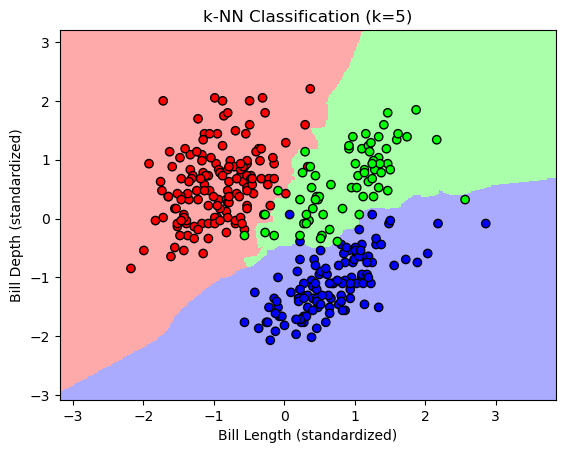

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Select features (bill length & bill depth) and target (species)
X = penguins[['bill_length_mm', 'bill_depth_mm']].values
#X = penguins[['flipper_length_mm', 'body_mass_g']].values
y = penguins['species'].values

# Encode species labels into numbers
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train k-NN classifier
n_neighbors = 5  # Adjust as needed
model = KNeighborsClassifier(n_neighbors=n_neighbors)
model.fit(X_train, y_train)

# Evaluate accuracy
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy:.2f}")

# Plot decision boundary
h = 0.02  # Step size for mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Define colormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

# Plot training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k')
plt.xlabel("Bill Length (standardized)")
plt.ylabel("Bill Depth (standardized)")
plt.title(f"k-NN Classification (k={n_neighbors})")

plt.show()


In [52]:
# Animation
import random
from matplotlib.animation import FuncAnimation
from IPython.display import display, HTML

fig, ax = plt.subplots(figsize=(8, 8))

K = 3
col = ['red', 'blue', 'green']

# Pick initial means randomly
means = np.array([random.choice(X_train) for _ in range(K)])

# Initial scatter plot (all black at start)
sc = ax.scatter(X_train[:, 0], X_train[:, 1], c='black', s=30, edgecolor='k')

# Initial centroids
centroid_scatter = ax.scatter(means[:, 0], means[:, 1], c=col, s=100, marker='X')

def update(frame):
    global means

    # Assign points to nearest centroid
    labels = []
    kmeans_loss = 0  # K-means loss function

    for x in X_train:
        distances = [np.linalg.norm(x - mean) for mean in means]
        min_idx = np.argmin(distances)
        labels.append(min_idx)
        kmeans_loss += distances[min_idx]**2  # Squared distance for loss

    labels = np.array(labels)

    # Update scatter colors
    sc.set_color([col[label] for label in labels])

    # Recalculate means
    new_means = []
    for k in range(K):
        points_in_k = X_train[labels == k]
        if len(points_in_k) > 0:
            new_mean = np.mean(points_in_k, axis=0)
        else:
            new_mean = means[k]  # Avoid empty cluster
        new_means.append(new_mean)

    means[:] = new_means  # Update in place

    # Update centroid scatter
    centroid_scatter.set_offsets(means)

    # Update title with current loss
    ax.set_title(f"K-means (Iteration {frame}) – Loss: {kmeans_loss:.2f}")

    return sc, centroid_scatter

ani = FuncAnimation(fig, update, frames=10, interval=80, repeat=False)

plt.close()  # Prevent static display
HTML(ani.to_jshtml())
    
